<a href="https://colab.research.google.com/github/kushal-arya/Deep-Learning-Projects/blob/main/deeplearning_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('housing.csv')


In [ ]:
data.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.shape

(20640, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [ ]:
# Checking for missing values
missing_data = data.isnull().sum()
print(missing_data)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
#Fill with median (for numerical attributes).
#Fill with the most frequent value (for categorical attributes).
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [ ]:
#For the ocean_proximity categorical variable, use one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)


In [ ]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


Finding Outliers:

In [ ]:
# Check for outliers (assuming numerical columns only
import numpy as np

# Assuming 'data' is your dataframe
numeric_columns = data.select_dtypes(include=[np.number])
outliers = {}
for col in numeric_columns.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)].shape[0]

print("Outliers:\n", outliers)



Outliers:
 {'longitude': 0, 'latitude': 0, 'housing_median_age': 0, 'total_rooms': 1287, 'total_bedrooms': 1306, 'population': 1196, 'households': 1220, 'median_income': 681, 'median_house_value': 1071, 'ocean_proximity_INLAND': 0, 'ocean_proximity_ISLAND': 5, 'ocean_proximity_NEAR BAY': 2290, 'ocean_proximity_NEAR OCEAN': 2658}


b. Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to scale
cols_to_scale = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                 'total_bedrooms', 'population', 'households', 'median_income']

scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])


List all types of data

In [ ]:
# List all unique data types in the dataset
unique_data_types = data.dtypes.unique()

print("Unique Data Types in the Dataset:")
for dtype in unique_data_types:
    print(dtype)

# Columns for each data type
for dtype in unique_data_types:
    print(f"\nColumns with Data Type {dtype}:")
    print(data.select_dtypes(include=[dtype]).columns.tolist())


Unique Data Types in the Dataset:
float64
uint8

Columns with Data Type float64:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

Columns with Data Type uint8:
['ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


# EDA


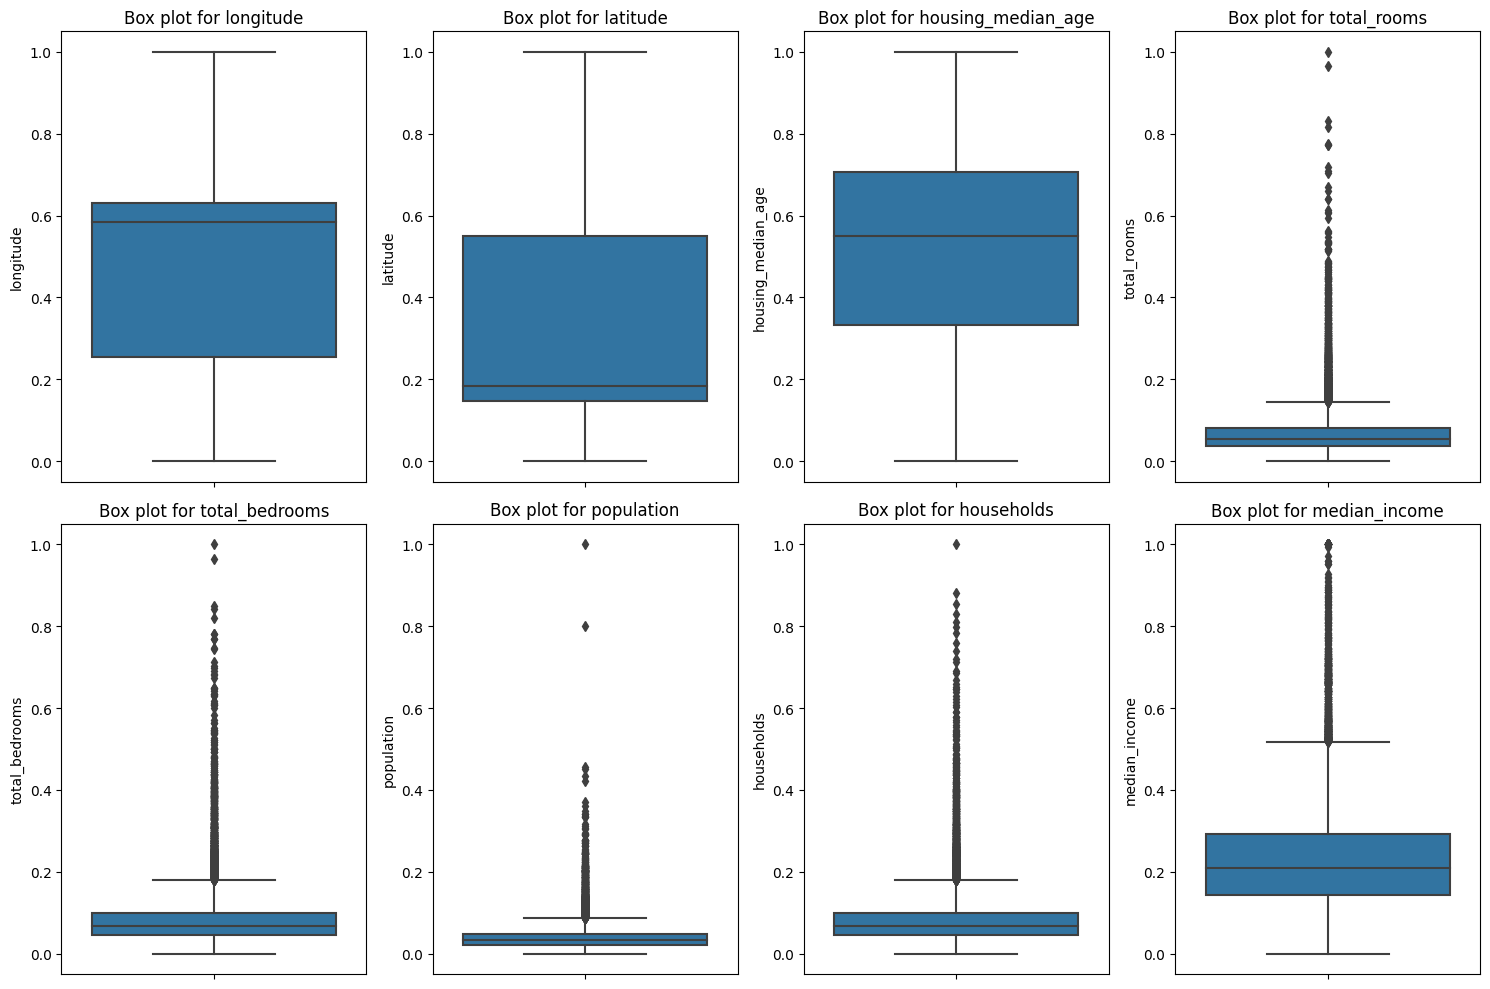

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample columns for which we'll plot the box plots
cols_to_plot = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income']

# Setting up the figure and axes
plt.figure(figsize=(15,10))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns
    sns.boxplot(y=data[col])
    plt.title(f'Box plot for {col}')
    plt.ylabel(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()


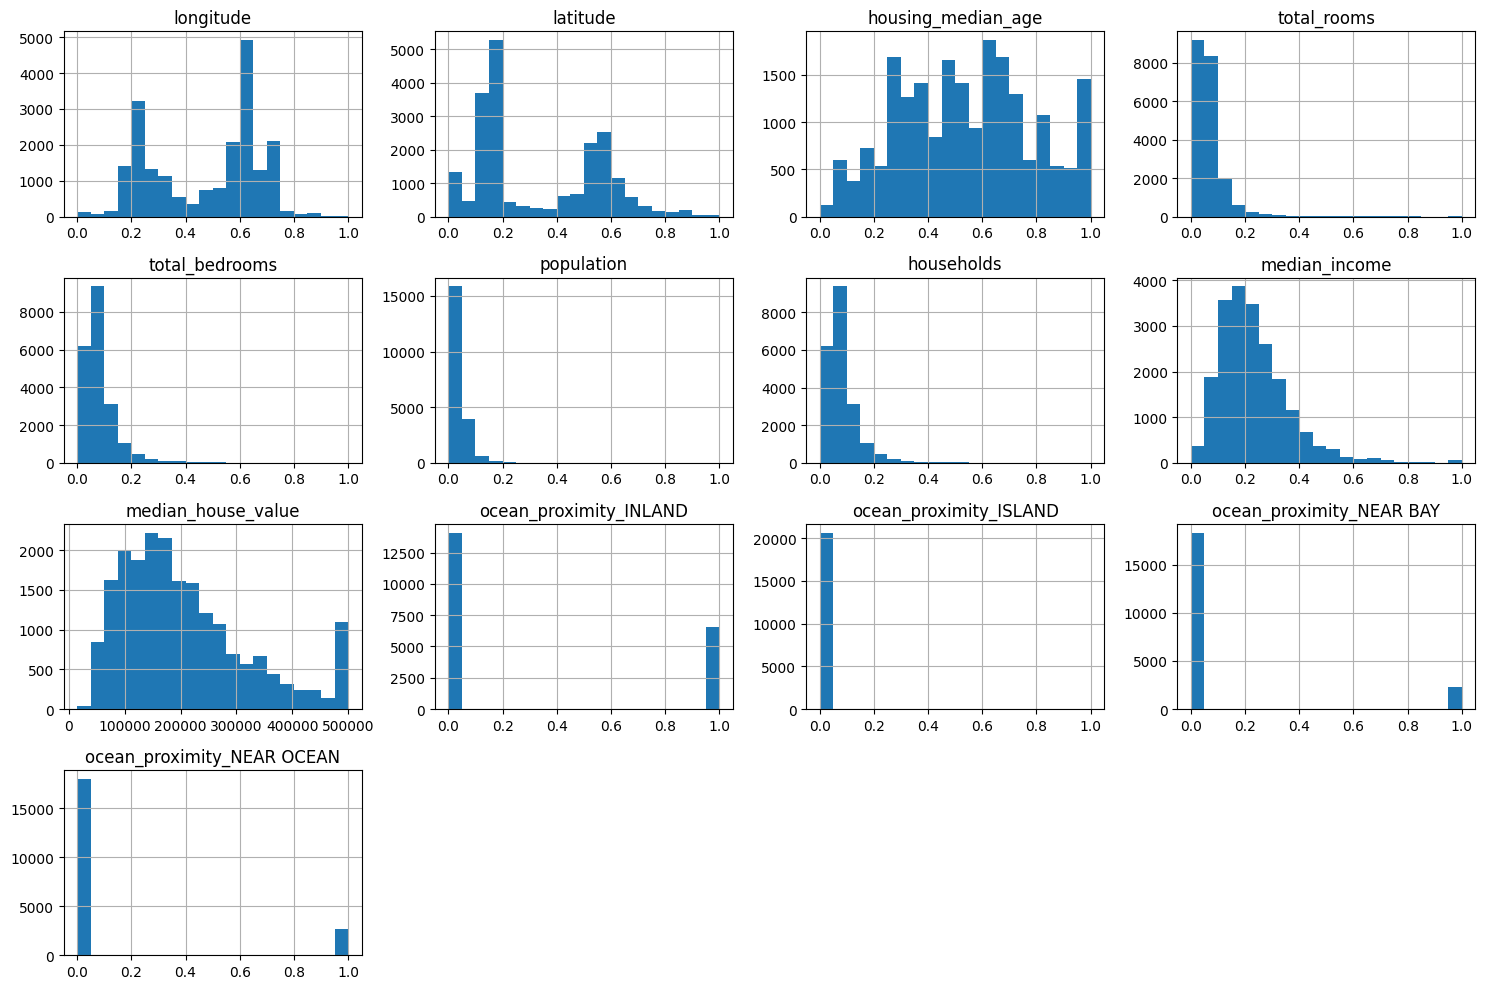

In [ ]:
# Plot distributions for numerical features
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

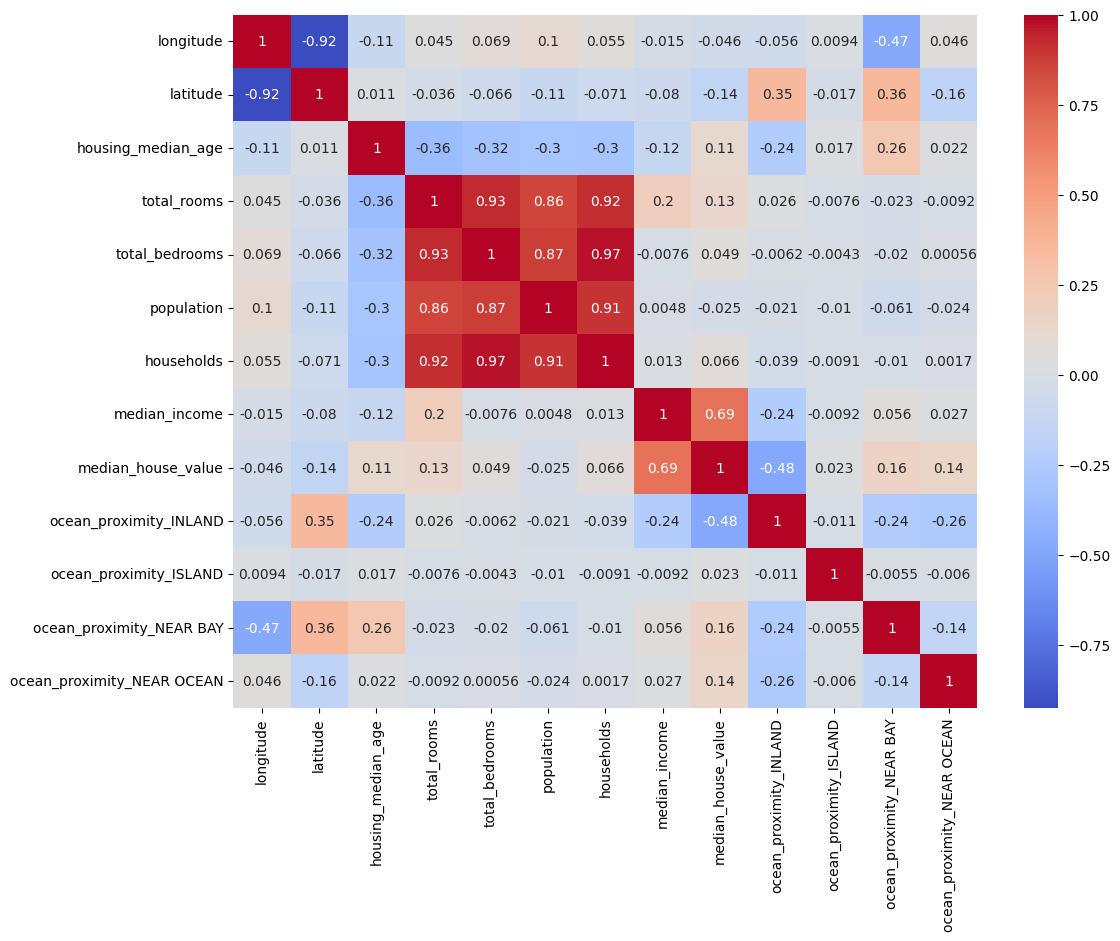

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# 3. Feature Importance:
One way to estimate feature importance is by using a tree-based model like the RandomForest

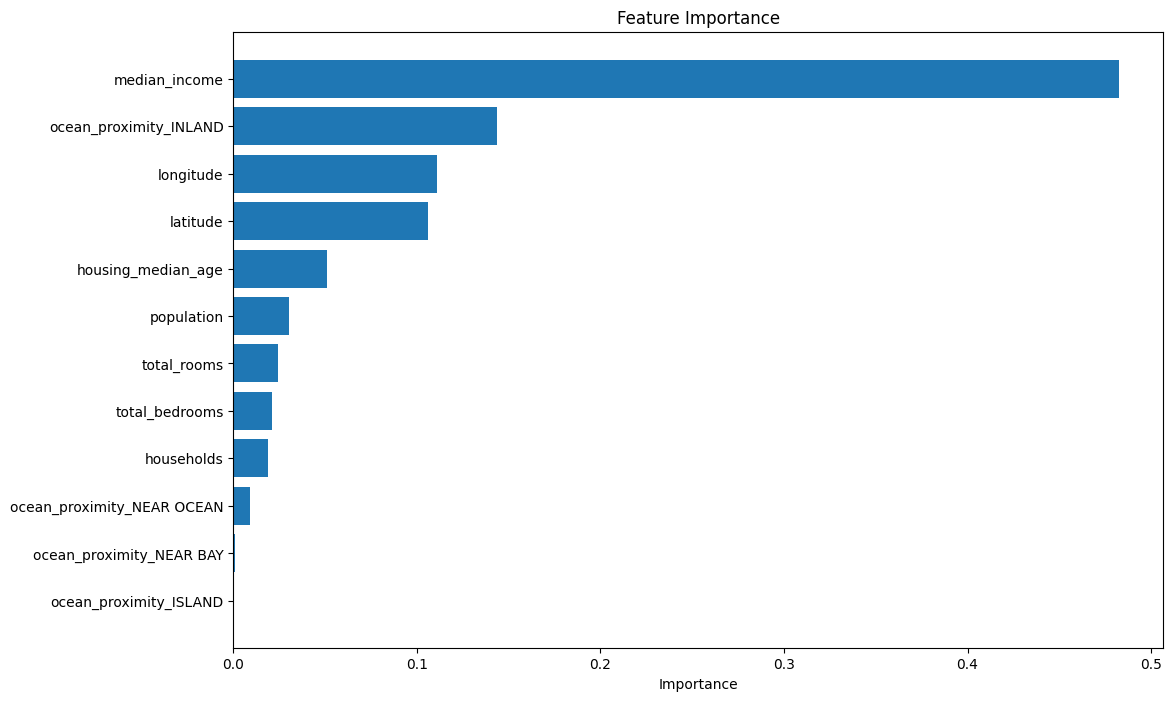

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'median_house_value' is the target column
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(12, 8))
sorted_idx = feature_importances.argsort()
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


In [ ]:
!pip install tensorflow_data_validation

In [ ]:
import tensorflow_data_validation as tfdv

stats = tfdv.generate_statistics_from_dataframe(data)


In [ ]:
tfdv.visualize_statistics(stats)


The plot will visually present the features in order of their importance in predicting the target label. Features at the top of the plot have the highest importance.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Preparing the Data

In [ ]:
# Assuming 'data' is your DataFrame
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)


# Building Models:

In [ ]:
from tensorflow import keras

mlp_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(learning_rate=0.001, clipvalue=1.0)
mlp_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
mlp_history = mlp_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)



In [ ]:
linear_model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(X_train.shape[1],))
])


linear_model.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics=['mae'])
linear_history=linear_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)


Epoch 1/100
516/516 [==============================] - 2s 2ms/step - loss: 53717561344.0000 - mae: 202066.0312 - val_loss: 65651605504.0000 - val_mae: 226008.9688
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 53716824064.0000 - mae: 202064.4688 - val_loss: 65650819072.0000 - val_mae: 226007.2969
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 53716123648.0000 - mae: 202062.6094 - val_loss: 65650053120.0000 - val_mae: 226005.5156
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 53715460096.0000 - mae: 202060.9219 - val_loss: 65649299456.0000 - val_mae: 226003.8281
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 53714788352.0000 - mae: 202059.3125 - val_loss: 65648553984.0000 - val_mae: 226002.0781
Epoch 6/100
516/516 [==============================] - 1s 3ms/step - loss: 53714075648.0000 - mae: 202057.4844 - val_loss: 65647755264.0000 - val_mae: 226000.4219
Epoch 7/100
516/516 [=

In [ ]:
dnn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=['mae'])
dnn_history=dnn_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)


Epoch 1/100
516/516 [==============================] - 2s 3ms/step - loss: 53619662848.0000 - mae: 201819.8906 - val_loss: 65271599104.0000 - val_mae: 225156.6250
Epoch 2/100
516/516 [==============================] - 2s 3ms/step - loss: 52646072320.0000 - mae: 199366.8438 - val_loss: 63279128576.0000 - val_mae: 220639.1094
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 49700696064.0000 - mae: 191762.3438 - val_loss: 58555719680.0000 - val_mae: 209535.3125
Epoch 4/100
516/516 [==============================] - 1s 3ms/step - loss: 44054978560.0000 - mae: 176123.2812 - val_loss: 50507456512.0000 - val_mae: 189097.5781
Epoch 5/100
516/516 [==============================] - 1s 3ms/step - loss: 35603824640.0000 - mae: 150349.9688 - val_loss: 39464722432.0000 - val_mae: 159480.8594
Epoch 6/100
516/516 [==============================] - 2s 3ms/step - loss: 25569103872.0000 - mae: 119287.2969 - val_loss: 27379369984.0000 - val_mae: 130356.6641
Epoch 7/100
516/516 [=

# Training the Models:

# Plotting Training vs. Validation Loss:

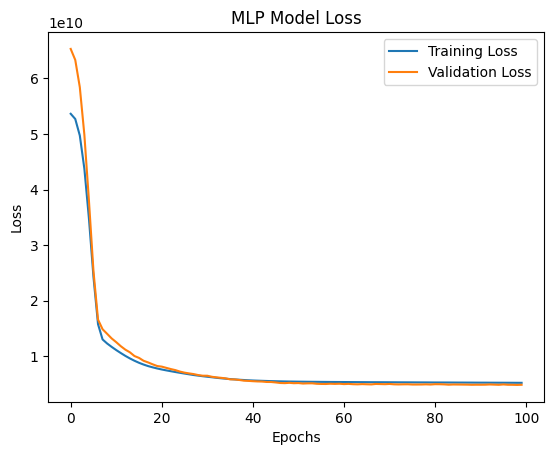

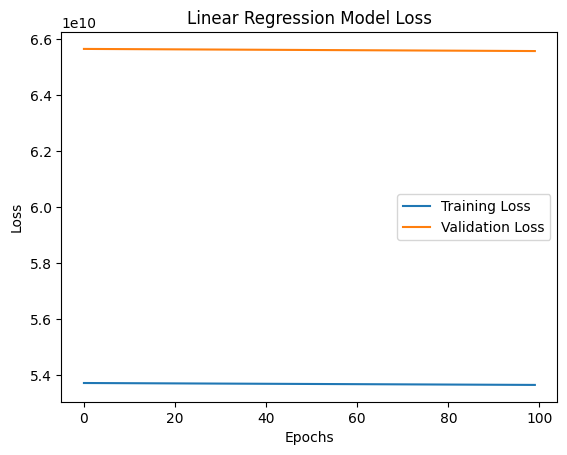

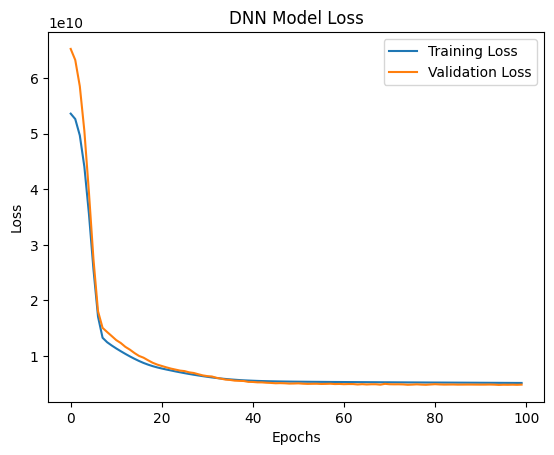

In [ ]:
def plot_loss(history, title):
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(mlp_history, 'MLP Model Loss')
plot_loss(linear_history, 'Linear Regression Model Loss')
plot_loss(dnn_history, 'DNN Model Loss')


# Selecting the Best Model:
To determine the best model, we'll compare the validation losses after the last epoch:

In [ ]:
final_val_loss = {
    "MLP": mlp_history.history['val_loss'][-1],
    "Linear": linear_history.history['val_loss'][-1],
    "DNN": dnn_history.history['val_loss'][-1]
}
print(final_val_loss)
best_model_name = min(final_val_loss, key=final_val_loss.get)
print(f"The best regression deep learning model is: {best_model_name}")


{'MLP': 4844618752.0, 'Linear': 65575571456.0, 'DNN': 4828037632.0}
The best regression deep learning model is: DNN


#  Predictions Using the Best Model

In [ ]:
# Selecting the model based on the best one determined
best_model = {"MLP": mlp_model, "Linear": linear_model, "DNN": dnn_model}[best_model_name]

# Making predictions
predictions = best_model.predict(X_val)

# Calculating loss
mse_loss = keras.losses.MSE(y_val, predictions)
mae_loss = keras.losses.MAE(y_val, predictions)

print(f"MSE Loss: {mse_loss.numpy().mean()}")
print(f"MAE Loss: {mae_loss.numpy().mean()}")


129/129 [==============================] - 0s 2ms/step
MSE Loss: 24309231616.0
MAE Loss: 122917.578125
